In [ ]:
from warnings import filterwarnings
filterwarnings ('ignore')


In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Step 2

In [4]:
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [8]:
df.shape

(150, 5)

## Step :3 - Seprate x and y

In [9]:
x = df.drop(columns = ['species'])
y = df[['species']]

In [10]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Step 4 : Preprocessing of data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [19]:
num_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy='mean')),
                             ('scaler', StandardScaler())]).set_output(transform = 'pandas')
X_pre = num_pipe.fit_transform(x)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Apply tain tes split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split (X_pre, y, test_size = 0.33, random_state=42)

In [23]:
X_pre = num_pipe.fit_transform(x)

In [24]:
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Apply tran test split

In [25]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [26]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [27]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


## Step 6: Create the model


In [30]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 33)
model1.fit (xtrain, ytrain)

d:\ML_work\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=33)

In [31]:
model1.score (xtrain, ytrain)

0.87

In [34]:
model1.score(xtest, ytest)

0.9

## Hyperparameter Tuning

In [41]:
params = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [42]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv1 = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
gscv1.fit(xtrain, ytrain)

d:\ML_work\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [43]:
gscv1.best_params_

{'n_neighbors': 3}

In [44]:
gscv1.best_score_

0.9319552669552669

In [45]:
best_knn = gscv1.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [46]:
best_knn.score(xtrain, ytrain)

0.95

In [48]:
best_knn.score(xtest, ytest)

0.98

## Model -2 SVM
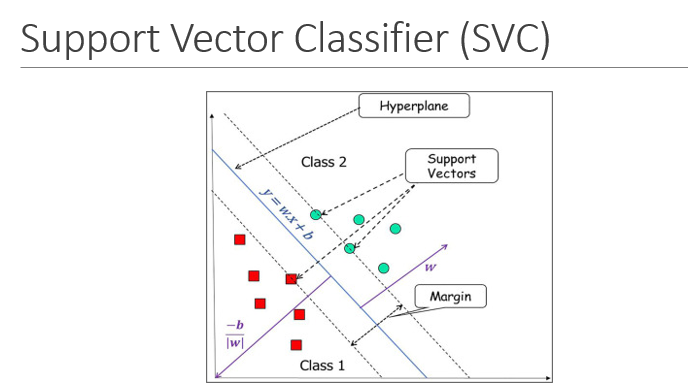

In [49]:
from sklearn.svm import SVC
model2 = SVC(probability= True)
model2.fit(xtrain, ytrain)

d:\ML_work\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [50]:
model2.score(xtrain, ytrain)

0.97

In [51]:
model2.score(xtest, ytest)

0.98

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score (model2, xtrain, ytrain, cv = 5, scoring = 'f1_macro')


d:\ML_work\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [54]:
scores.mean()

0.9319552669552669

## In above case both models ar good choose any one for out of sampe prediction

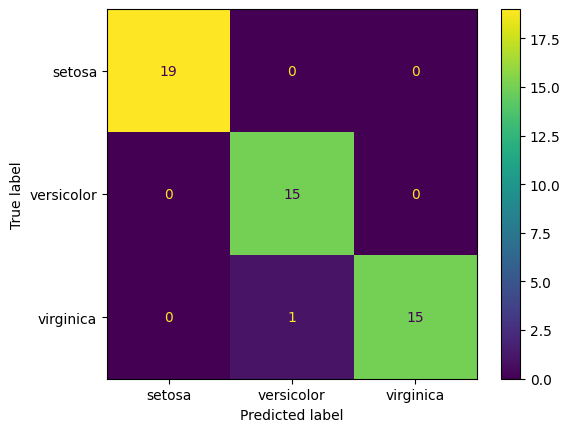

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model2, xtest, ytest)

In [56]:
ypred_train = model2.predict(xtrain)
ypred_test = model2.predict(xtest)

In [57]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [58]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## out of sample prediction

In [61]:
xnew = pd.read_csv ('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [63]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [64]:



preds = model2.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [65]:
probs = model2.predict_proba(xnew_pre)
probs[0:5]

array([[0.00786686, 0.966416  , 0.02571714],
       [0.0122619 , 0.01917399, 0.9685641 ],
       [0.0327703 , 0.95131854, 0.01591115],
       [0.63180759, 0.28583346, 0.08235895],
       [0.01378845, 0.20670806, 0.77950349]])

In [66]:
model2.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [67]:
import numpy as np
max_probs = np.max(probs, axis = 1)
max_probs


array([0.966416  , 0.9685641 , 0.95131854, 0.63180759, 0.77950349,
       0.95802524, 0.93946229, 0.95243971, 0.96302216, 0.81043547,
       0.97875121, 0.9790035 , 0.96366051, 0.7398027 , 0.57741628])

## Save aove results with prob

In [68]:
xnew['species-pred'] = preds
xnew['prob'] = max_probs

In [69]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species-pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.966416
1,6.9,3.1,5.1,2.3,virginica,0.968564
2,5.1,2.5,3.0,1.1,versicolor,0.951319
3,4.4,2.9,NaN,0.2,setosa,0.631808
4,5.9,3.0,5.1,1.8,virginica,0.779503
5,5.5,3.5,1.3,0.2,setosa,0.958025
6,5.6,NaN,3.6,1.3,versicolor,0.939462
7,6.5,3.0,5.2,2.0,virginica,0.952440
8,5.3,3.7,1.5,0.2,setosa,0.963022
9,5.1,3.4,1.5,NaN,setosa,0.810435
